In [13]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests 

In [15]:
reviews  = []
stars = []
date = []
country = []

In [17]:
for i in range(1, 36):
    page = requests.get(f"https://www.airlinequality.com/airline-reviews/british-airways/page/{i}/?sortby=post_date%3ADesc&pagesize=100")
    
    soup = BeautifulSoup(page.content, "html.parser")
    
    for item in soup.find_all("div", class_="text_content"):
        reviews.append(item.text)
    
    for item in soup.find_all("div", class_ = "rating-10"):
        try:
            stars.append(item.span.text)
        except:
            print(f"Error on page {i}")
            stars.append("None")
            
    #date
    for item in soup.find_all("time"):
        date.append(item.text)
        
    #country
    for item in soup.find_all("h3"):
        country.append(item.span.next_sibling.text.strip(" ()"))

Error on page 34
Error on page 35


In [18]:
len(reviews)

3500

In [19]:
len(country)

3500

In [69]:
stars = stars[:3500]

In [71]:
df = pd.DataFrame({"reviews":reviews,"stars": stars, "date":date, "country": country})

In [73]:
df.head()

reviews  \
0  ✅ Trip Verified | Although transferring to thi...   
1  ✅ Trip Verified |   We are extremely grateful ...   
2  ✅ Trip Verified |   I had an appalling experie...   
3  Not Verified |  Good points, the cabin crew, t...   
4  Not Verified |  It was a decent flight, reason...   

                         stars             date         country  
0  \n\t\t\t\t\t\t\t\t\t\t\t\t5    15th May 2025   United States  
1                            8     8th May 2025     Switzerland  
2                           10  29th April 2025    South Africa  
3                            3  22nd April 2025  United Kingdom  
4                            6  22nd April 2025  United Kingdom

In [75]:
df.shape

(3500, 4)

In [87]:
import os

cwd = os.getcwd()
df.to_csv(cwd+ "/BA_reviews78.csv")

In [89]:
print("Saving to:", cwd)

Saving to: C:\Users\lalin


In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
import re

In [95]:
df = pd.read_csv(cwd+"/BA_reviews.csv", index_col=0)

In [97]:
df.head()


reviews  stars             date  \
0  ✅ Trip Verified | Although transferring to thi...    5.0    15th May 2025   
1  ✅ Trip Verified |   We are extremely grateful ...    8.0     8th May 2025   
2  ✅ Trip Verified |   I had an appalling experie...   10.0  29th April 2025   
3  Not Verified |  Good points, the cabin crew, t...    3.0  22nd April 2025   
4  Not Verified |  It was a decent flight, reason...    6.0  22nd April 2025   

          country  
0   United States  
1     Switzerland  
2    South Africa  
3  United Kingdom  
4  United Kingdom

In [99]:
df['verified'] = df.reviews.str.contains("Trip Verified")

In [101]:
df['verified']


0        True
1        True
2        True
3       False
4       False
        ...  
3495    False
3496    False
3497    False
3498    False
3499    False
Name: verified, Length: 3500, dtype: bool

In [103]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()


In [105]:
reviews_data = df.reviews.str.strip("✅ Trip Verified |")

In [107]:
corpus =[]

In [109]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

corpus = []

for rev in reviews_data:
   
    rev = re.sub('[^a-zA-Z]', ' ', rev).lower()
    
    
    words = rev.split()
    
    
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    
    
    cleaned_review = " ".join(words)
    
    corpus.append(cleaned_review)


In [111]:
df['corpus'] = corpus

In [113]:
df.head()

reviews  stars             date  \
0  ✅ Trip Verified | Although transferring to thi...    5.0    15th May 2025   
1  ✅ Trip Verified |   We are extremely grateful ...    8.0     8th May 2025   
2  ✅ Trip Verified |   I had an appalling experie...   10.0  29th April 2025   
3  Not Verified |  Good points, the cabin crew, t...    3.0  22nd April 2025   
4  Not Verified |  It was a decent flight, reason...    6.0  22nd April 2025   

          country  verified                                             corpus  
0   United States      True  transferring flight heathrow budapest took hou...  
1     Switzerland      True  extremely grateful crew flight ba cape town he...  
2    South Africa      True  appalling experience british airways started t...  
3  United Kingdom     False  verified good points cabin crew helpful profes...  
4  United Kingdom     False  verified decent flight reasonable comfortable ...

In [115]:
df.dtypes

reviews      object
stars       float64
date         object
country      object
verified       bool
corpus       object
dtype: object

In [117]:
df['date'] = df['date'].apply(lambda x: re.sub(r'(\d+)(st|nd|rd|th)', r'\1', str(x)))
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')


In [119]:
df.date.head()

0   2025-05-15
1   2025-05-08
2   2025-04-29
3   2025-04-22
4   2025-04-22
Name: date, dtype: datetime64[ns]

In [121]:
df.stars.unique()

array([ 5.,  8., 10.,  3.,  6.,  1.,  7.,  9.,  4.,  2., nan])

In [123]:
df.stars.value_counts()

stars
1.0     894
2.0     406
3.0     402
8.0     336
7.0     273
10.0    272
9.0     267
5.0     245
4.0     234
6.0     170
Name: count, dtype: int64

In [125]:
df.drop(df[df.stars == "nan"].index, axis=0, inplace=True)

In [127]:
df.stars.unique()

array([ 5.,  8., 10.,  3.,  6.,  1.,  7.,  9.,  4.,  2., nan])

In [129]:

df.isnull().value_counts()

reviews  stars  date   country  verified  corpus
False    False  False  False    False     False     3498
                       True     False     False        1
         True   False  False    False     False        1
Name: count, dtype: int64

In [131]:
df.country.isnull().value_counts()

country
False    3499
True        1
Name: count, dtype: int64

In [133]:
df.drop(df[df.country.isnull() == True].index, axis=0, inplace=True)

In [135]:

df.shape

(3499, 6)

In [137]:
df.reset_index(drop=True)

reviews  stars       date  \
0     ✅ Trip Verified | Although transferring to thi...    5.0 2025-05-15   
1     ✅ Trip Verified |   We are extremely grateful ...    8.0 2025-05-08   
2     ✅ Trip Verified |   I had an appalling experie...   10.0 2025-04-29   
3     Not Verified |  Good points, the cabin crew, t...    3.0 2025-04-22   
4     Not Verified |  It was a decent flight, reason...    6.0 2025-04-22   
...                                                 ...    ...        ...   
3494  IAH-LHR B747 which was old but sat upstairs an...   10.0 2014-12-04   
3495  YVR-LHR-AMS. An uneventful journey with BA but...    8.0 2014-12-04   
3496  Have just completed four flights with British ...    5.0 2014-12-04   
3497  British Airways for some reason was incapable ...    9.0 2014-12-04   
3498  BA216 from Washington to London in World Trave...    5.0 2014-12-04   

             country  verified  \
0      United States      True   
1        Switzerland      True   
2       South Africa      True   
3     United Kingdom     False   
4     United Kingdom     False   
...              ...       ...   
3494   United States     False   
3495          Canada     False   
3496    South Africa     False   
3497   United States     False   
3498   United States     False   

                                                 corpus  
0     transferring flight heathrow budapest took hou...  
1     extremely grateful crew flight ba cape town he...  
2     appalling experience british airways started t...  
3     verified good points cabin crew helpful profes...  
4     verified decent flight reasonable comfortable ...  
...                                                 ...  
3494  iah lhr b old sat upstairs pleasant charged ex...  
3495  yvr lhr ams uneventful journey ba boeing vanco...  
3496  just completed flights british airways economy...  
3497  british airways reason incapable seating husba...  
3498  ba washington london world traveller plus ba s...  

[3499 rows x 6 columns]

In [139]:
df.to_csv(cwd + "/cleaned-BA-reviews6.csv")

In [141]:
pip install WordCloud


Note: you may need to restart the kernel to use updated packages.


In [143]:
pip install STOPWORDS

Note: you may need to restart the kernel to use updated packages.


In [145]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

In [147]:
cwd = os.getcwd()
df = pd.read_csv(cwd+"/cleaned-BA-reviews.csv", index_col=0)


df = df.reset_index(drop=True)

In [149]:
df.head()

reviews  stars        date  \
0  ✅ Trip Verified | Although transferring to thi...    5.0  2025-05-15   
1  ✅ Trip Verified |   We are extremely grateful ...    8.0  2025-05-08   
2  ✅ Trip Verified |   I had an appalling experie...   10.0  2025-04-29   
3  Not Verified |  Good points, the cabin crew, t...    3.0  2025-04-22   
4  Not Verified |  It was a decent flight, reason...    6.0  2025-04-22   

          country  verified                                             corpus  
0   United States      True  transferring flight heathrow budapest took hou...  
1     Switzerland      True  extremely grateful crew flight ba cape town he...  
2    South Africa      True  appalling experience british airways started t...  
3  United Kingdom     False  verified good points cabin crew helpful profes...  
4  United Kingdom     False  verified decent flight reasonable comfortable ...

In [151]:
df.stars.mean()

4.518867924528302

Text(0.5, 0.98, 'Counts for each ratings')

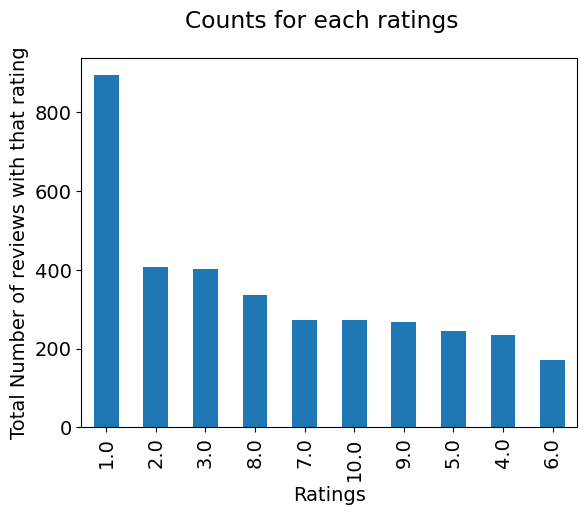

In [153]:
df.stars.value_counts().plot(kind="bar")
plt.xlabel("Ratings")
plt.ylabel("Total Number of reviews with that rating")
plt.suptitle("Counts for each ratings")

In [155]:
df_ratings = df['stars'].value_counts().reset_index()
df_ratings.columns = ['stars', 'count']

# Calculate percentage values
total = df_ratings['count'].sum()
df_ratings['pct_values'] = round(df_ratings['count'] / total * 100, 2)

In [157]:
df_ratings = df_ratings.reset_index()

In [159]:
df_ratings.rename(columns={'index':'Stars', 'stars':'total_counts'}, inplace=True)

In [161]:

df_ratings

Stars  total_counts  count  pct_values
0      0           1.0    894       25.56
1      1           2.0    406       11.61
2      2           3.0    402       11.49
3      3           8.0    335        9.58
4      4           7.0    273        7.80
5      5          10.0    272        7.78
6      6           9.0    267        7.63
7      7           5.0    245        7.00
8      8           4.0    234        6.69
9      9           6.0    170        4.86

C:\Users\lalin\AppData\Local\Temp\ipykernel_2676\1427792072.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Stars', y='count', data=df_ratings, errwidth=0, palette=clrs)
C:\Users\lalin\AppData\Local\Temp\ipykernel_2676\1427792072.py:2: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  ax = sns.barplot(x='Stars', y='count', data=df_ratings, errwidth=0, palette=clrs)


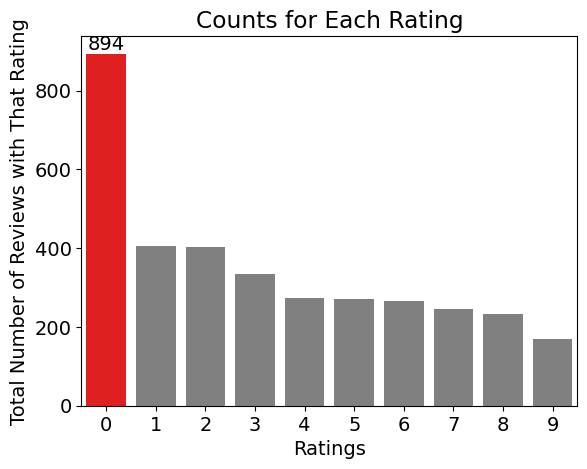

In [163]:



clrs = ['Red' if x == max(df_ratings['count']) else 'grey' for x in df_ratings['count']]
ax = sns.barplot(x='Stars', y='count', data=df_ratings, errwidth=0, palette=clrs)


ax.bar_label(ax.containers[0])


ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of Reviews with That Rating")
ax.set_title("Counts for Each Rating")

plt.show()


In [165]:
print(f"{len(df.country.unique())} unique countries")

71 unique countries


In [167]:
df_country_review = pd.DataFrame(df.country.value_counts().head()).reset_index()

In [169]:
df_country_review.rename(columns={'index':'country','country':'total_reviews'}, inplace=True)

In [171]:
print(df_country_review.columns)
print(df_country_review.head())


Index(['total_reviews', 'count'], dtype='object')
    total_reviews  count
0  United Kingdom   2165
1   United States    420
2       Australia    136
3          Canada    109
4         Germany     66


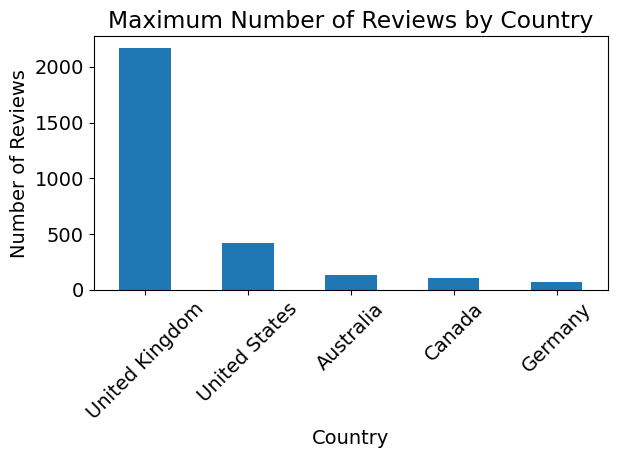

In [173]:
df_country_review.plot(kind='bar', x='total_reviews', y='count', legend=False)

plt.title("Maximum Number of Reviews by Country")
plt.xlabel("Country")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [175]:
print(df.columns)
print(df.dtypes)

Index(['reviews', 'stars', 'date', 'country', 'verified', 'corpus'], dtype='object')
reviews      object
stars       float64
date         object
country      object
verified       bool
corpus       object
dtype: object


In [177]:
df_country_rating = (
    df.groupby('country', as_index=False)['stars']
      .mean()
      .sort_values(by='stars', ascending=False)
)

In [179]:

df_country_rating.rename(columns={'stars':'avg_rating'}, inplace=True)

Text(0.5, 1.0, 'Top 12 Countries with avg highest rating provided to British Airways')

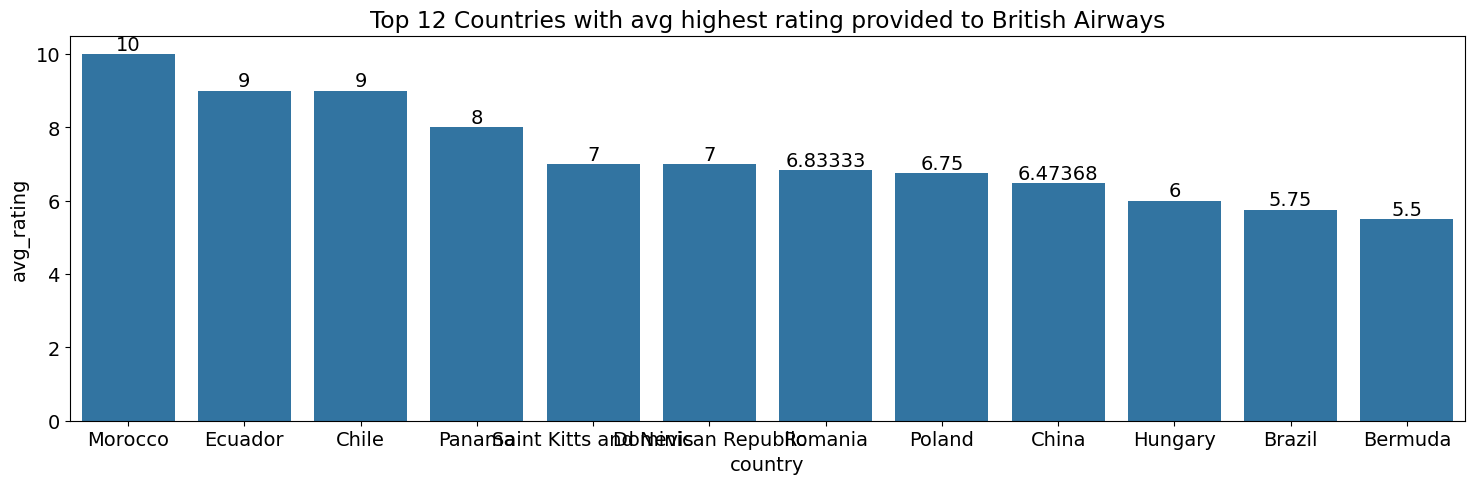

In [181]:
fig, ax = plt.subplots(figsize=(18,5))
ax1 = sns.barplot(x='country', y='avg_rating', data=df_country_rating[:12])
ax.bar_label(ax.containers[0])
ax.set_title("Top 12 Countries with avg highest rating provided to British Airways")

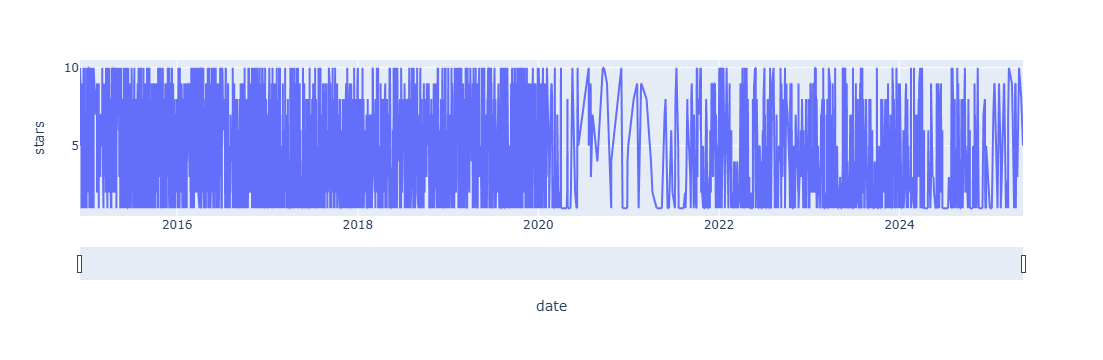

In [183]:
fig = px.line(df, x='date', y="stars")
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [184]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lalin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

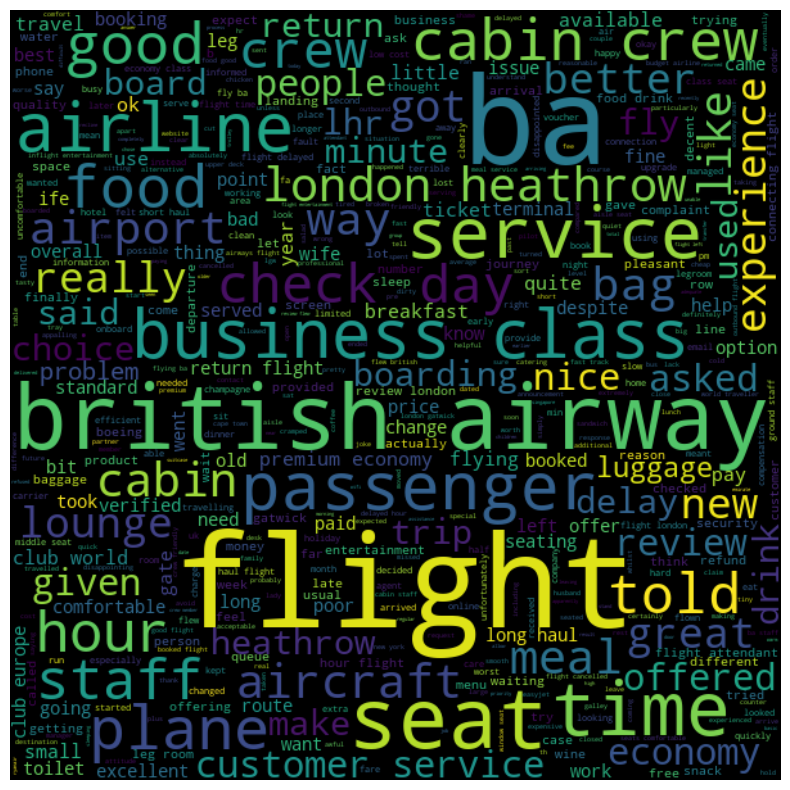

In [187]:
from nltk.corpus import stopwords
# Start with one review:
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))

# Create and generate a word cloud image:
wordcloud = WordCloud(height=600,width=600,max_font_size=100, max_words=500, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


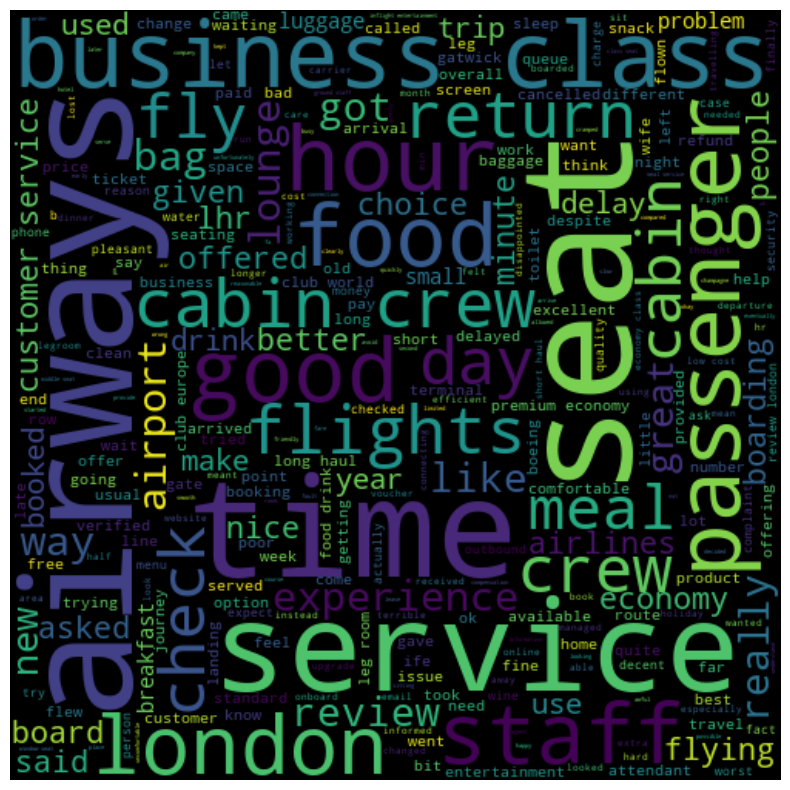

In [188]:
from nltk.corpus import stopwords
reviews = " ".join(df.corpus)
plt.figure(figsize=(20,10))

stopwords = set(stopwords.words('english'))
stopwords.update(["ba","flight", "british","airway", "airline","plane", "told","also","passenger" \
                 "london", "heathrow", "aircraft", "could","even", "would"])
# Create and generate a word cloud image:
wordcloud = WordCloud(height=500,width=500,max_font_size=100, max_words=300, stopwords=stopwords).generate(reviews)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [191]:
from nltk import ngrams
from nltk.probability import FreqDist

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

#split the text of all reviews into a list of words
words = reviews.split(" ")

#remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger","u", "london","airway","british","airline",\
                                           "heathrow","plane","lhr","review"])


new_words = [word for word in words if word not in stopwords]

nlp_words=FreqDist(new_words).most_common(20)

#create a dataframe of these word and its frequencies
all_fdist = pd.Series(dict(nlp_words))

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'service'),
  Text(1, 0, 't'),
  Text(2, 0, 'seat'),
  Text(3, 0, 'airways'),
  Text(4, 0, 'food'),
  Text(5, 0, 'crew'),
  Text(6, 0, 'time'),
  Text(7, 0, 'seats'),
  Text(8, 0, 'good'),
  Text(9, 0, 'cabin'),
  Text(10, 0, 'class'),
  Text(11, 0, 'business'),
  Text(12, 0, 's'),
  Text(13, 0, 'staff'),
  Text(14, 0, 'economy'),
  Text(15, 0, 'check'),
  Text(16, 0, 'flights'),
  Text(17, 0, 'hours'),
  Text(18, 0, 'just'),
  Text(19, 0, 'return')])

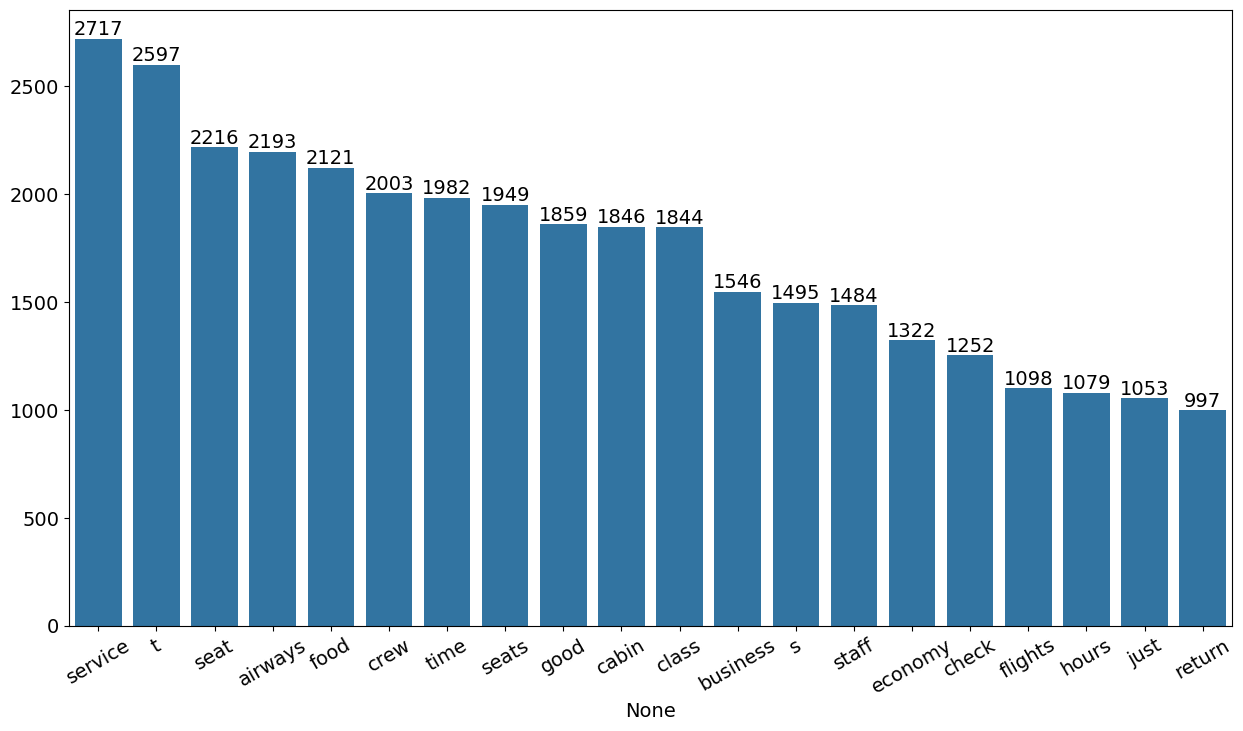

In [205]:
fig, ax = plt.subplots(figsize=(15,8))


all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
all_plot.bar_label(all_plot.containers[0])
plt.xticks(rotation=30)

<Axes: >

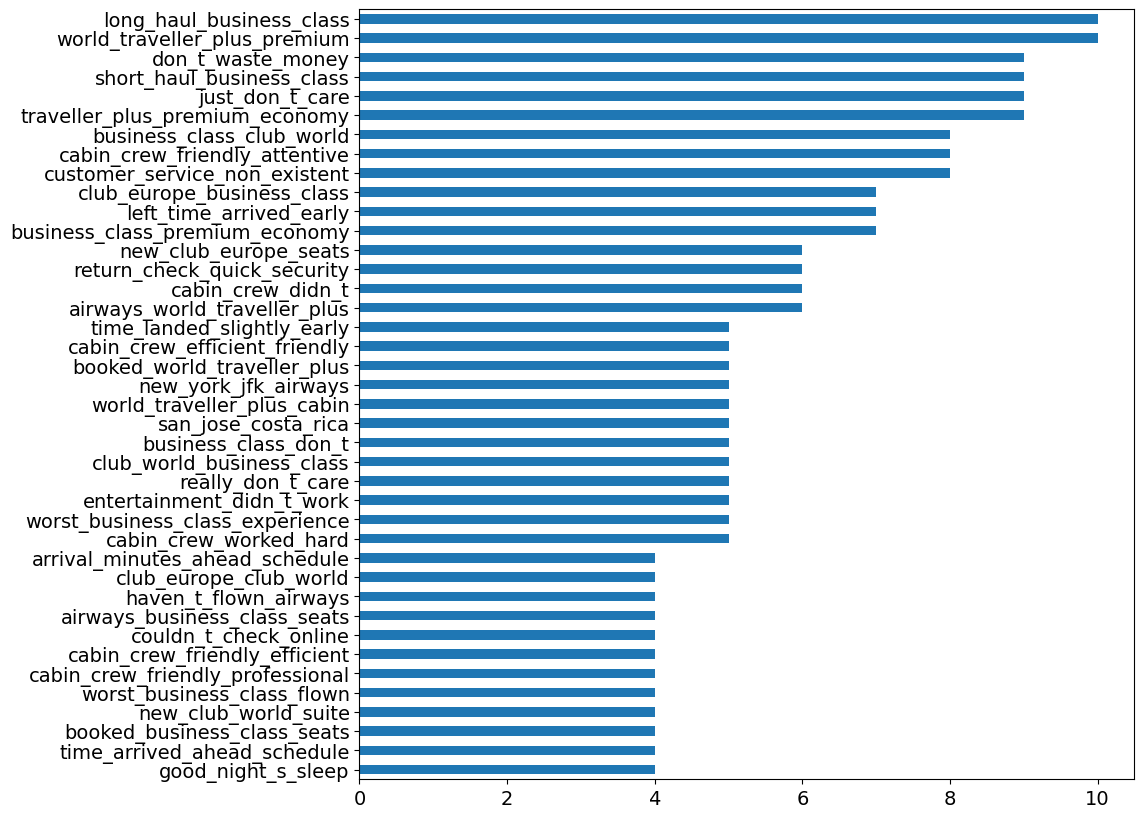

In [195]:
import nltk.collocations as collocations
from nltk import FreqDist, bigrams

reviews = " ".join(df.corpus)

#split the text of all reviews into a list of words
words = reviews.split(" ")

new_words = [word for word in words if word not in stopwords]

def get_freq_dist(new_words,number_of_ngrams ):
    from nltk import ngrams
    
    ## Generate bigrams
    ngrams = ngrams(new_words, number_of_ngrams)

    ## Creating FreqDist
    ngram_fd = FreqDist(ngrams).most_common(40)

    ## Sort values by highest frequency
    ngram_sorted = {k:v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Join bigram tokens with '_' + maintain sorting
    ngram_joined = {'_'.join(k):v for k,v in sorted(ngram_fd, key=lambda item:item[1])}

    ## Convert to Pandas series for easy plotting
    ngram_freqdist = pd.Series(ngram_joined)
    plt.figure(figsize=(10,10))
    ax = ngram_freqdist.plot(kind="barh")
    
    return ax


get_freq_dist(new_words,4)

In [197]:
ratings_1_3 = df[df.stars.isin([1,2,3])]
ratings_4_6 = df[df.stars.isin([4,5,6])]
ratings_7_10 = df[df.stars.isin([7,8,9,10])]

<Axes: >

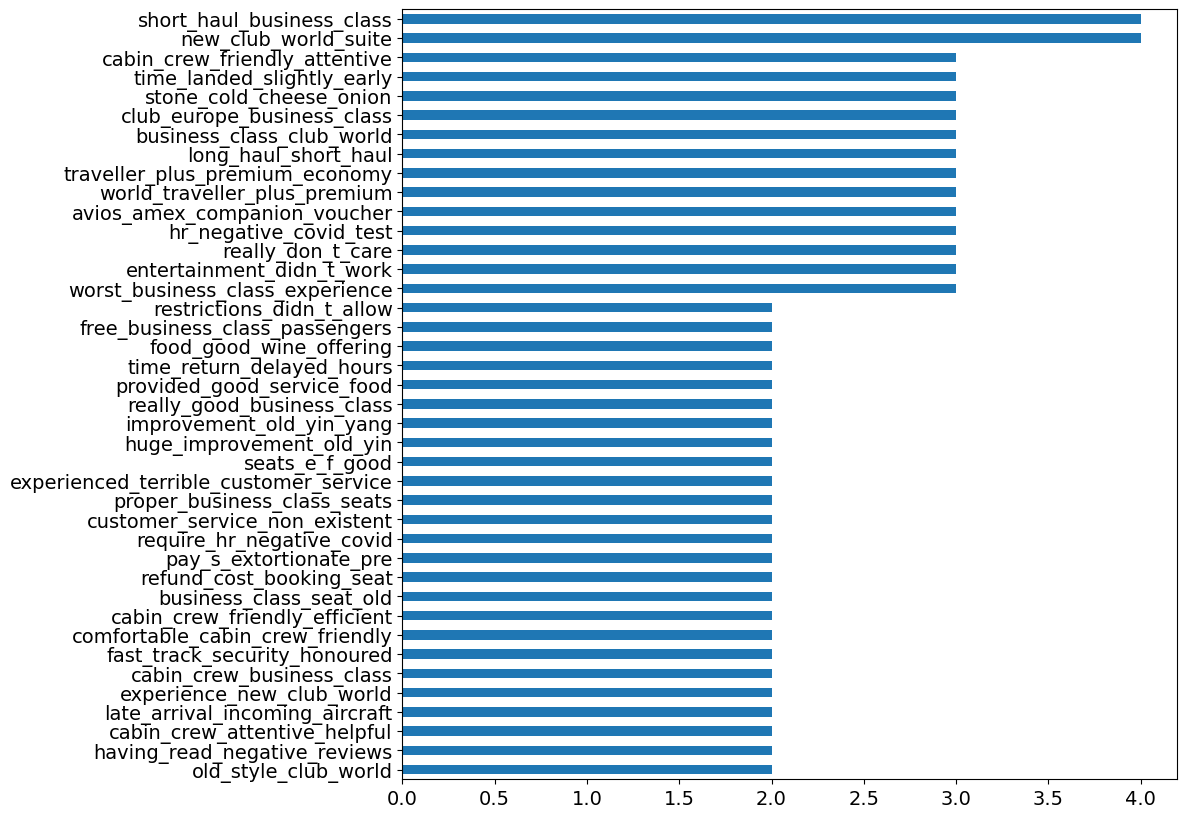

In [199]:
reviews_1_3 = " ".join(ratings_1_3.corpus)
reviews_4_6 = " ".join(ratings_4_6.corpus)
reviews_7_10 = " ".join(ratings_7_10.corpus)

#split the text of all reviews into a list of words
words_1_3 = reviews_1_3.split(" ")
words_4_6 = reviews_4_6.split(" ")
words_7_10 = reviews_7_10.split(" ")


new_words_7_10 = [word for word in words_7_10 if word not in stopwords]

get_freq_dist(new_words_7_10,4)

<Axes: >

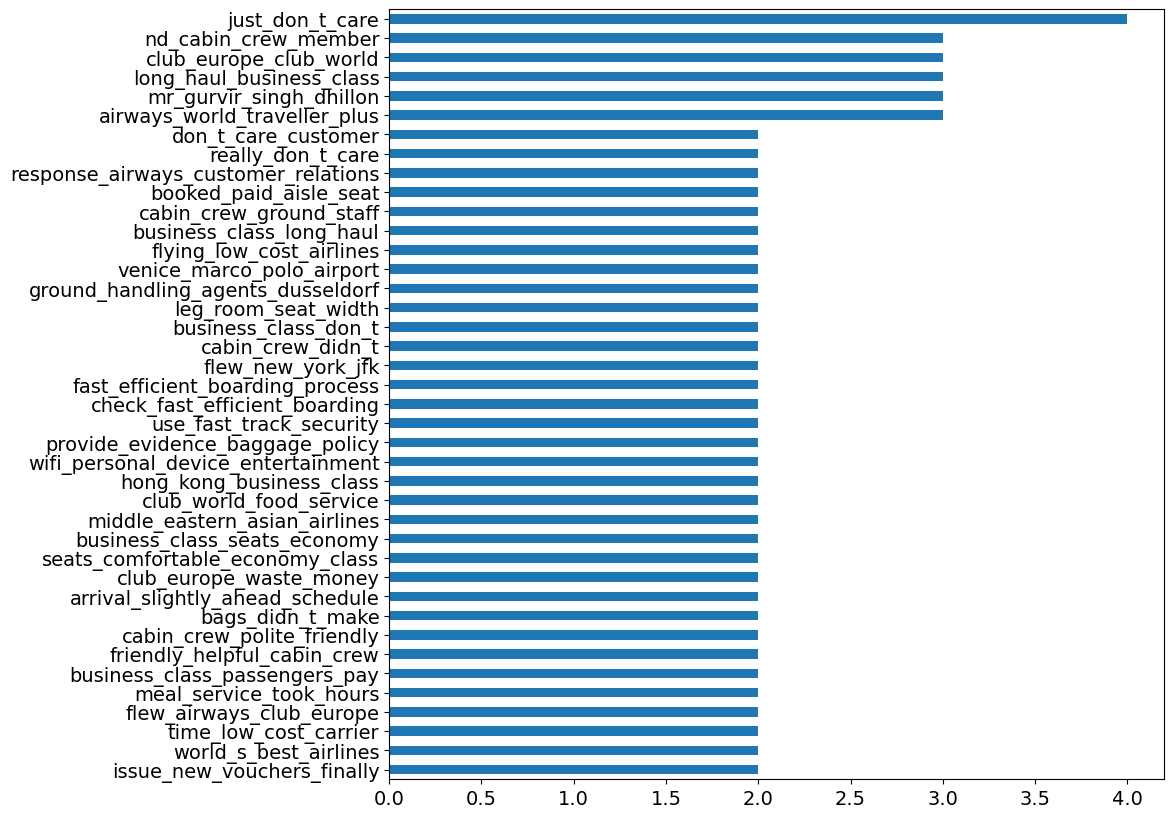

In [201]:
new_words = [word for word in words_4_6 if word not in stopwords]

get_freq_dist(new_words,4)

<Axes: >

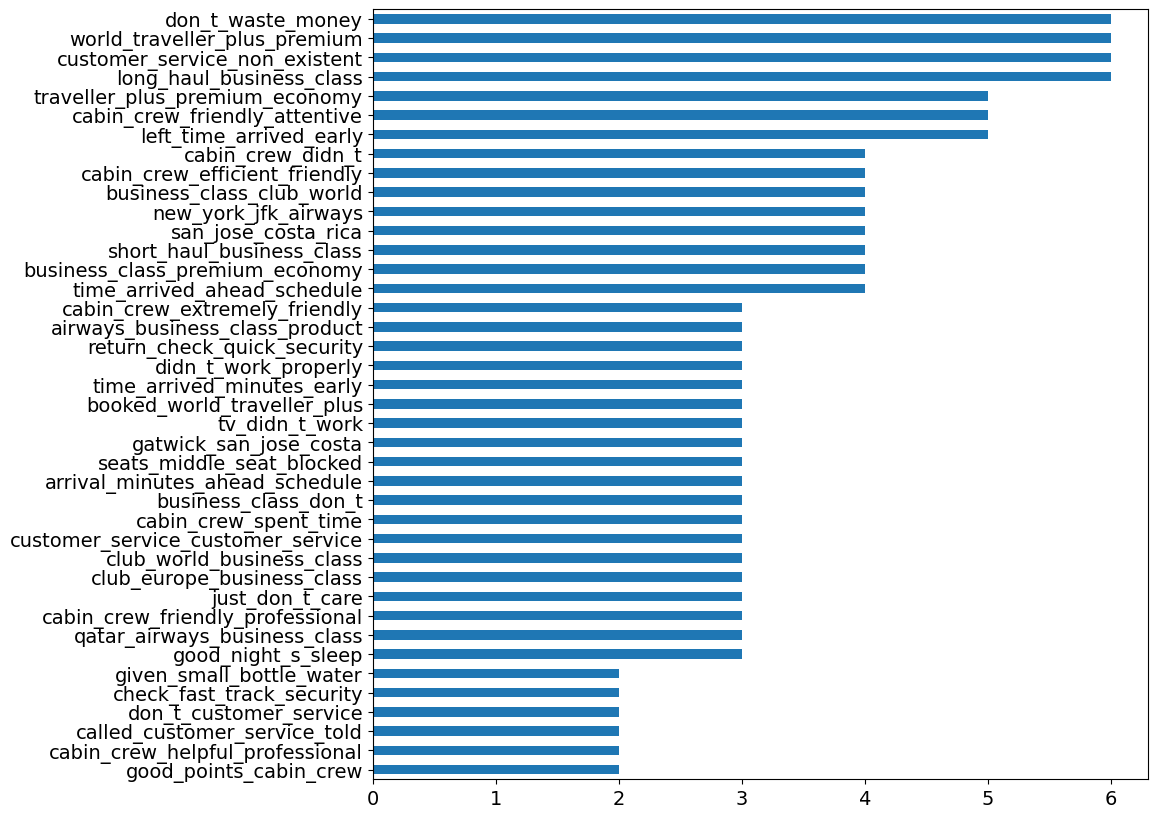

In [203]:
new_words = [word for word in words_1_3 if word not in stopwords]

get_freq_dist(new_words,4)